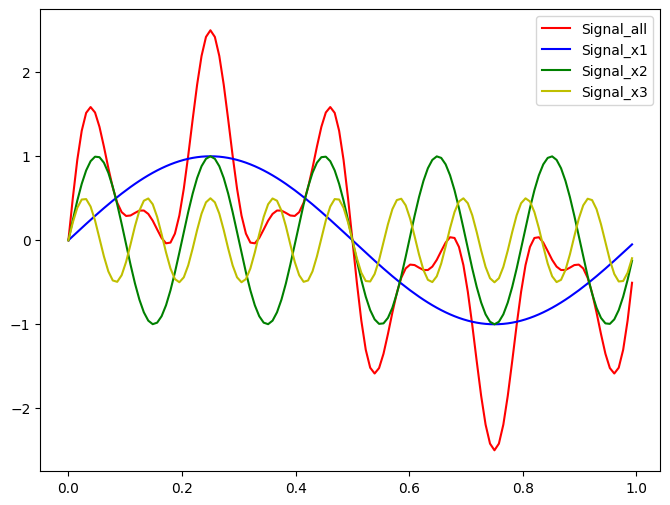

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def FFT(x):
    N = len(x)
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate([X_even+factor[:int(N/2)]*X_odd,X_even+factor[int(N/2):]*X_odd])
        return X

N = 128
dt = 1.0/N
t = np.arange(0,1,dt)

x1 = np.sin(2*np.pi*t)
x2 = np.sin(2*np.pi*5*t)
x3 = 0.5* np.sin(2*np.pi*9*t)
x=x1+x2+x3
plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r', label='Signal_all')
plt.plot(t, x1, 'b', label='Signal_x1')
plt.plot(t, x2, 'g', label='Signal_x2')
plt.plot(t, x3, 'y', label='Signal_x3')
plt.legend()
plt.show()


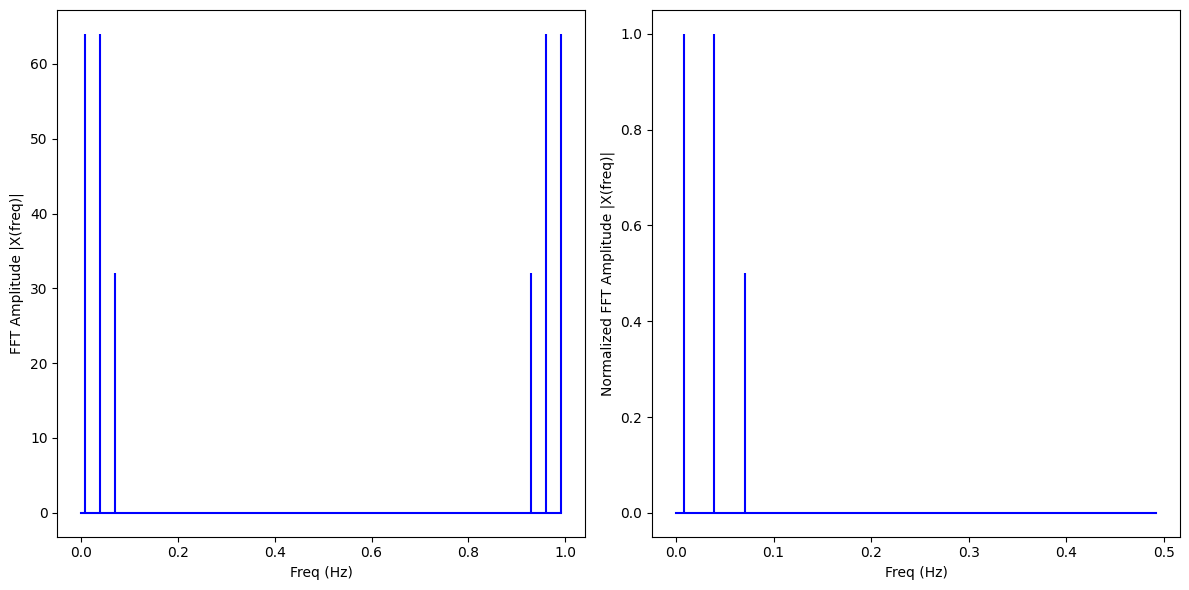

In [5]:
X=FFT(x)
n = np.arange(N)
freq = n/N
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()
